In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import random
import cv2
import os
import PIL
import pathlib


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
import struct
import numpy as np
from keras.layers import Conv2D
from keras.layers import Input
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU
from keras.layers import ZeroPadding2D
from keras.layers import UpSampling2D
from keras.layers import add, concatenate
from keras.layers import concatenate
from keras.models import Model

In [3]:
import numpy as np
from numpy import expand_dims
from keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import img_to_array
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from PIL import Image

In [4]:
from tensorflow.keras.applications import InceptionResNetV2, VGG19,MobileNetV2
from tensorflow.keras.applications import DenseNet169,ResNet50,MobileNet,InceptionV3

In [5]:
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.layers import Flatten, Input, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D , Flatten, MaxPooling2D
from tensorflow.keras.optimizers import Adam


In [7]:
import wandb
from wandb.keras import WandbMetricsLogger, WandbModelCheckpoint, WandbEvalCallback

wandb.login()

wandb: Currently logged in as: akshaj-pvss (akshaj_pydimarri). Use `wandb login --relogin` to force relogin


True

In [8]:
import splitfolders
splitfolders.ratio('.\husk_data\Augmented Image', output=".\husk_spl", seed=1337, ratio=(0.8, 0.1, 0.1))

Copying files: 9281 files [01:36, 96.17 files/s] 


In [6]:
import os

def list_directories(directory):
    # Get list of all entries in the directory
    entries = os.listdir(directory)
    
    # Filter out directories
    directories = [entry for entry in entries if os.path.isdir(os.path.join(directory, entry))]
    
    return directories

# Specify the directory path
directory_path = r'.\husk_spl'

# List directories in the specified directory
directories = list_directories(directory_path)

# Print the list of directories
for directory in directories:
    print(directory)


test
train
val


In [7]:
train_path = 'husk_spl/train'
val_path = 'husk_spl/val'
test_path = 'husk_spl/test'

In [8]:
from glob import glob
folders1 = glob(r'husk_spl/train/*')
folders1

['husk_spl/train\\1.Rice Husk (Oryza sativa)',
 'husk_spl/train\\2.Corn Husk (Zea mays)',
 'husk_spl/train\\3.Wheat Husk (Triticum aestivum)',
 'husk_spl/train\\4.Chickpea Husk (Cicer arietinum )',
 'husk_spl/train\\5.Lentil Husk (Lens culinaris)',
 'husk_spl/train\\6.Soybean Husk (Glycine max)',
 'husk_spl/train\\7.Grass Pea Husk (Lathyrus sativus)',
 'husk_spl/train\\8.Field Pea Husk (Pisum Sativum var. arvense L. Poiret)']

In [9]:
print(len(folders1))

8


TypeError: Image data of dtype object cannot be converted to float

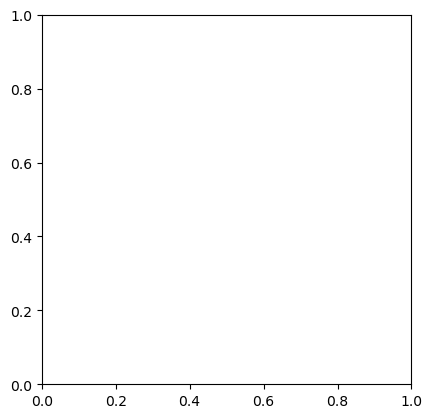

In [10]:
sample_img = cv2.imread('husk_spl/train/2.Corn Husk (Zea mays)/CornHusk0.jpg')
plt.imshow(sample_img)
print(f'Image dimensions: {sample_img.shape}')

In [12]:
Image_shape = [299,299]

In [13]:
model = InceptionResNetV2(input_shape = Image_shape+[3],weights='imagenet', include_top=False)

In [14]:
model.trainable = False

In [16]:
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import Model
x = model.output
x = GlobalAveragePooling2D()(x)

# x = Dense(512, activation='relu')(x)
# # x = Dropout(.25)(x)
# x = Dense(256, activation='relu')(x)
# # x = Dropout(.25)(x)
# x = Dense(128, activation='relu')(x)
# # x = Dropout(.25)(x)
# x = Dense(64, activation='relu')(x)
# x = Dense(64, activation='relu')(x)
#x = Dense(256, activation='relu')(x)
#x = Dense(128, activation='relu')(x)
#x = Dense(512, activation='relu')(x)
predictions = Dense(len(folders1), activation='softmax')(x)

model_1 = Model(inputs=model.input, outputs=predictions)

model_1.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 149, 149, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 149, 149, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 149, 149, 32)         0         ['batch_normalization[0][0

 conv2d_11 (Conv2D)          (None, 35, 35, 64)           12288     ['average_pooling2d[0][0]']   
                                                                                                  
 batch_normalization_5 (Bat  (None, 35, 35, 96)           288       ['conv2d_5[0][0]']            
 chNormalization)                                                                                 
                                                                                                  
 batch_normalization_7 (Bat  (None, 35, 35, 64)           192       ['conv2d_7[0][0]']            
 chNormalization)                                                                                 
                                                                                                  
 batch_normalization_10 (Ba  (None, 35, 35, 96)           288       ['conv2d_10[0][0]']           
 tchNormalization)                                                                                
          

 block35_1_conv (Conv2D)     (None, 35, 35, 320)          41280     ['block35_1_mixed[0][0]']     
                                                                                                  
 custom_scale_layer (Custom  (None, 35, 35, 320)          0         ['mixed_5b[0][0]',            
 ScaleLayer)                                                         'block35_1_conv[0][0]']      
                                                                                                  
 block35_1_ac (Activation)   (None, 35, 35, 320)          0         ['custom_scale_layer[0][0]']  
                                                                                                  
 conv2d_21 (Conv2D)          (None, 35, 35, 32)           10240     ['block35_1_ac[0][0]']        
                                                                                                  
 batch_normalization_21 (Ba  (None, 35, 35, 32)           96        ['conv2d_21[0][0]']           
 tchNormal

                                                                                                  
 activation_25 (Activation)  (None, 35, 35, 32)           0         ['batch_normalization_25[0][0]
                                                                    ']                            
                                                                                                  
 activation_28 (Activation)  (None, 35, 35, 48)           0         ['batch_normalization_28[0][0]
                                                                    ']                            
                                                                                                  
 conv2d_24 (Conv2D)          (None, 35, 35, 32)           10240     ['block35_2_ac[0][0]']        
                                                                                                  
 conv2d_26 (Conv2D)          (None, 35, 35, 32)           9216      ['activation_25[0][0]']       
          

                                                                                                  
 activation_32 (Activation)  (None, 35, 35, 32)           0         ['batch_normalization_32[0][0]
                                                                    ']                            
                                                                                                  
 activation_35 (Activation)  (None, 35, 35, 64)           0         ['batch_normalization_35[0][0]
                                                                    ']                            
                                                                                                  
 block35_4_mixed (Concatena  (None, 35, 35, 128)          0         ['activation_30[0][0]',       
 te)                                                                 'activation_32[0][0]',       
                                                                     'activation_35[0][0]']       
          

                                                                    ']                            
                                                                                                  
 conv2d_43 (Conv2D)          (None, 35, 35, 32)           10240     ['block35_5_ac[0][0]']        
                                                                                                  
 conv2d_46 (Conv2D)          (None, 35, 35, 48)           13824     ['activation_45[0][0]']       
                                                                                                  
 batch_normalization_43 (Ba  (None, 35, 35, 32)           96        ['conv2d_43[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 batch_normalization_46 (Ba  (None, 35, 35, 48)           144       ['conv2d_46[0][0]']           
 tchNormal

 batch_normalization_48 (Ba  (None, 35, 35, 32)           96        ['conv2d_48[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 batch_normalization_50 (Ba  (None, 35, 35, 32)           96        ['conv2d_50[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 batch_normalization_53 (Ba  (None, 35, 35, 64)           192       ['conv2d_53[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_48 (Activation)  (None, 35, 35, 32)           0         ['batch_normalization_48[0][0]
          

 custom_scale_layer_7 (Cust  (None, 35, 35, 320)          0         ['block35_7_ac[0][0]',        
 omScaleLayer)                                                       'block35_8_conv[0][0]']      
                                                                                                  
 block35_8_ac (Activation)   (None, 35, 35, 320)          0         ['custom_scale_layer_7[0][0]']
                                                                                                  
 conv2d_63 (Conv2D)          (None, 35, 35, 32)           10240     ['block35_8_ac[0][0]']        
                                                                                                  
 batch_normalization_63 (Ba  (None, 35, 35, 32)           96        ['conv2d_63[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activatio

                                                                    ']                            
                                                                                                  
 activation_70 (Activation)  (None, 35, 35, 48)           0         ['batch_normalization_70[0][0]
                                                                    ']                            
                                                                                                  
 conv2d_66 (Conv2D)          (None, 35, 35, 32)           10240     ['block35_9_ac[0][0]']        
                                                                                                  
 conv2d_68 (Conv2D)          (None, 35, 35, 32)           9216      ['activation_67[0][0]']       
                                                                                                  
 conv2d_71 (Conv2D)          (None, 35, 35, 64)           27648     ['activation_70[0][0]']       
          

                                                                                                  
 activation_77 (Activation)  (None, 17, 17, 128)          0         ['batch_normalization_77[0][0]
                                                                    ']                            
                                                                                                  
 conv2d_78 (Conv2D)          (None, 17, 17, 160)          143360    ['activation_77[0][0]']       
                                                                                                  
 batch_normalization_78 (Ba  (None, 17, 17, 160)          480       ['conv2d_78[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_78 (Activation)  (None, 17, 17, 160)          0         ['batch_normalization_78[0][0]
          

                                                                                                  
 batch_normalization_85 (Ba  (None, 17, 17, 128)          384       ['conv2d_85[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_85 (Activation)  (None, 17, 17, 128)          0         ['batch_normalization_85[0][0]
                                                                    ']                            
                                                                                                  
 conv2d_86 (Conv2D)          (None, 17, 17, 160)          143360    ['activation_85[0][0]']       
                                                                                                  
 batch_normalization_86 (Ba  (None, 17, 17, 160)          480       ['conv2d_86[0][0]']           
 tchNormal

                                                                    ]                             
                                                                                                  
 conv2d_93 (Conv2D)          (None, 17, 17, 128)          139264    ['block17_4_ac[0][0]']        
                                                                                                  
 batch_normalization_93 (Ba  (None, 17, 17, 128)          384       ['conv2d_93[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_93 (Activation)  (None, 17, 17, 128)          0         ['batch_normalization_93[0][0]
                                                                    ']                            
                                                                                                  
 conv2d_94

 tomScaleLayer)                                                      'block17_6_conv[0][0]']      
                                                                                                  
 block17_6_ac (Activation)   (None, 17, 17, 1088)         0         ['custom_scale_layer_15[0][0]'
                                                                    ]                             
                                                                                                  
 conv2d_101 (Conv2D)         (None, 17, 17, 128)          139264    ['block17_6_ac[0][0]']        
                                                                                                  
 batch_normalization_101 (B  (None, 17, 17, 128)          384       ['conv2d_101[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activatio

 block17_8_conv (Conv2D)     (None, 17, 17, 1088)         418880    ['block17_8_mixed[0][0]']     
                                                                                                  
 custom_scale_layer_17 (Cus  (None, 17, 17, 1088)         0         ['block17_7_ac[0][0]',        
 tomScaleLayer)                                                      'block17_8_conv[0][0]']      
                                                                                                  
 block17_8_ac (Activation)   (None, 17, 17, 1088)         0         ['custom_scale_layer_17[0][0]'
                                                                    ]                             
                                                                                                  
 conv2d_109 (Conv2D)         (None, 17, 17, 128)          139264    ['block17_8_ac[0][0]']        
                                                                                                  
 batch_nor

 block17_10_mixed (Concaten  (None, 17, 17, 384)          0         ['activation_112[0][0]',      
 ate)                                                                'activation_115[0][0]']      
                                                                                                  
 block17_10_conv (Conv2D)    (None, 17, 17, 1088)         418880    ['block17_10_mixed[0][0]']    
                                                                                                  
 custom_scale_layer_19 (Cus  (None, 17, 17, 1088)         0         ['block17_9_ac[0][0]',        
 tomScaleLayer)                                                      'block17_10_conv[0][0]']     
                                                                                                  
 block17_10_ac (Activation)  (None, 17, 17, 1088)         0         ['custom_scale_layer_19[0][0]'
                                                                    ]                             
          

 activation_123 (Activation  (None, 17, 17, 192)          0         ['batch_normalization_123[0][0
 )                                                                  ]']                           
                                                                                                  
 block17_12_mixed (Concaten  (None, 17, 17, 384)          0         ['activation_120[0][0]',      
 ate)                                                                'activation_123[0][0]']      
                                                                                                  
 block17_12_conv (Conv2D)    (None, 17, 17, 1088)         418880    ['block17_12_mixed[0][0]']    
                                                                                                  
 custom_scale_layer_21 (Cus  (None, 17, 17, 1088)         0         ['block17_11_ac[0][0]',       
 tomScaleLayer)                                                      'block17_12_conv[0][0]']     
          

 activation_128 (Activation  (None, 17, 17, 192)          0         ['batch_normalization_128[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_131 (Activation  (None, 17, 17, 192)          0         ['batch_normalization_131[0][0
 )                                                                  ]']                           
                                                                                                  
 block17_14_mixed (Concaten  (None, 17, 17, 384)          0         ['activation_128[0][0]',      
 ate)                                                                'activation_131[0][0]']      
                                                                                                  
 block17_14_conv (Conv2D)    (None, 17, 17, 1088)         418880    ['block17_14_mixed[0][0]']    
          

 batch_normalization_139 (B  (None, 17, 17, 192)          576       ['conv2d_139[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_136 (Activation  (None, 17, 17, 192)          0         ['batch_normalization_136[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_139 (Activation  (None, 17, 17, 192)          0         ['batch_normalization_139[0][0
 )                                                                  ]']                           
                                                                                                  
 block17_16_mixed (Concaten  (None, 17, 17, 384)          0         ['activation_136[0][0]',      
 ate)     

 batch_normalization_144 (B  (None, 17, 17, 192)          576       ['conv2d_144[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 batch_normalization_147 (B  (None, 17, 17, 192)          576       ['conv2d_147[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_144 (Activation  (None, 17, 17, 192)          0         ['batch_normalization_144[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_147 (Activation  (None, 17, 17, 192)          0         ['batch_normalization_147[0][0
 )        

                                                                                                  
 conv2d_155 (Conv2D)         (None, 17, 17, 192)          215040    ['activation_154[0][0]']      
                                                                                                  
 batch_normalization_152 (B  (None, 17, 17, 192)          576       ['conv2d_152[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 batch_normalization_155 (B  (None, 17, 17, 192)          576       ['conv2d_155[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_152 (Activation  (None, 17, 17, 192)          0         ['batch_normalization_152[0][0
 )        

 g2D)                                                                                             
                                                                                                  
 mixed_7a (Concatenate)      (None, 8, 8, 2080)           0         ['activation_157[0][0]',      
                                                                     'activation_159[0][0]',      
                                                                     'activation_162[0][0]',      
                                                                     'max_pooling2d_3[0][0]']     
                                                                                                  
 conv2d_164 (Conv2D)         (None, 8, 8, 192)            399360    ['mixed_7a[0][0]']            
                                                                                                  
 batch_normalization_164 (B  (None, 8, 8, 192)            576       ['conv2d_164[0][0]']          
 atchNorma

 e)                                                                  'activation_170[0][0]']      
                                                                                                  
 block8_2_conv (Conv2D)      (None, 8, 8, 2080)           933920    ['block8_2_mixed[0][0]']      
                                                                                                  
 custom_scale_layer_31 (Cus  (None, 8, 8, 2080)           0         ['block8_1_ac[0][0]',         
 tomScaleLayer)                                                      'block8_2_conv[0][0]']       
                                                                                                  
 block8_2_ac (Activation)    (None, 8, 8, 2080)           0         ['custom_scale_layer_31[0][0]'
                                                                    ]                             
                                                                                                  
 conv2d_17

 )                                                                  ]']                           
                                                                                                  
 block8_4_mixed (Concatenat  (None, 8, 8, 448)            0         ['activation_175[0][0]',      
 e)                                                                  'activation_178[0][0]']      
                                                                                                  
 block8_4_conv (Conv2D)      (None, 8, 8, 2080)           933920    ['block8_4_mixed[0][0]']      
                                                                                                  
 custom_scale_layer_33 (Cus  (None, 8, 8, 2080)           0         ['block8_3_ac[0][0]',         
 tomScaleLayer)                                                      'block8_4_conv[0][0]']       
                                                                                                  
 block8_4_

 )                                                                  ]']                           
                                                                                                  
 activation_186 (Activation  (None, 8, 8, 256)            0         ['batch_normalization_186[0][0
 )                                                                  ]']                           
                                                                                                  
 block8_6_mixed (Concatenat  (None, 8, 8, 448)            0         ['activation_183[0][0]',      
 e)                                                                  'activation_186[0][0]']      
                                                                                                  
 block8_6_conv (Conv2D)      (None, 8, 8, 2080)           933920    ['block8_6_mixed[0][0]']      
                                                                                                  
 custom_sc

 atchNormalization)                                                                               
                                                                                                  
 activation_191 (Activation  (None, 8, 8, 192)            0         ['batch_normalization_191[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_194 (Activation  (None, 8, 8, 256)            0         ['batch_normalization_194[0][0
 )                                                                  ]']                           
                                                                                                  
 block8_8_mixed (Concatenat  (None, 8, 8, 448)            0         ['activation_191[0][0]',      
 e)                                                                  'activation_194[0][0]']      
          

 atchNormalization)                                                                               
                                                                                                  
 batch_normalization_202 (B  (None, 8, 8, 256)            768       ['conv2d_202[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_199 (Activation  (None, 8, 8, 192)            0         ['batch_normalization_199[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_202 (Activation  (None, 8, 8, 256)            0         ['batch_normalization_202[0][0
 )                                                                  ]']                           
          

In [17]:
model_1.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   rotation_range = 5,
                                   horizontal_flip = True)
val_datagen = ImageDataGenerator(rescale = 1./255)

In [19]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 shuffle = True,
                                                 class_mode = 'categorical')

Found 7424 images belonging to 8 classes.


In [20]:
test_set = val_datagen.flow_from_directory(test_path,
                                          target_size = (224, 224),
                                          batch_size = 32,
                                          shuffle = True,
                                          class_mode = 'categorical')

Found 929 images belonging to 8 classes.


In [21]:
val_set = val_datagen.flow_from_directory(val_path,
                                          target_size = (224, 224),
                                          batch_size = 32,
                                          shuffle = True,
                                          class_mode = 'categorical')

Found 928 images belonging to 8 classes.


In [22]:
training_set.data_format

'channels_last'

In [23]:
epo = 30

In [24]:
batch_size =32
img_height, img_width =299,299
input_shape = (img_height, img_width, 3)
CONFIG=dict(
batch_size =32,
img_height=299,
img_width =299,
)

In [25]:
CONFIG = {'model_name': 'InceptionResNetUpDown'}

print('Training configuration:', CONFIG)

# Initialize W&B run
run = wandb.init(settings=wandb.Settings(start_method="spawn"),
                  reinit=True,
                  project='husk',
                  entity="akshaj_pydimarri",
                  config=CONFIG,
                  group='InceptionResNetV2',
                  job_type='train')

# Set the type attribute of wandb.config
wandb.config.type = 'baseline'

Training configuration: {'model_name': 'InceptionResNetUpDown'}


In [26]:
wandb_callbacks = [
    WandbMetricsLogger(),
    WandbModelCheckpoint(filepath=".\wandb"),
]
r = model_1.fit(training_set,
                validation_data=test_set,
                epochs=epo,
                steps_per_epoch=len(training_set),
                validation_steps = len(test_set),
                callbacks = wandb_callbacks)

Epoch 1/30


232/232 [==============================] - ETA: 0s - loss: 1.0090 - accuracy: 0.6402INFO:tensorflow:Assets written to: .\wandb\assets


INFO:tensorflow:Assets written to: .\wandb\assets
wandb: Adding directory to artifact (.\wandb)... Done. 0.8s


232/232 [==============================] - 1000s 4s/step - loss: 1.0090 - accuracy: 0.6402 - val_loss: 0.6765 - val_accuracy: 0.7546
Epoch 2/30
232/232 [==============================] - ETA: 0s - loss: 0.6479 - accuracy: 0.7744INFO:tensorflow:Assets written to: .\wandb\assets


INFO:tensorflow:Assets written to: .\wandb\assets
wandb: Adding directory to artifact (.\wandb)... Done. 0.7s


232/232 [==============================] - 829s 4s/step - loss: 0.6479 - accuracy: 0.7744 - val_loss: 0.5805 - val_accuracy: 0.7826
Epoch 3/30
232/232 [==============================] - ETA: 0s - loss: 0.5637 - accuracy: 0.7984INFO:tensorflow:Assets written to: .\wandb\assets


INFO:tensorflow:Assets written to: .\wandb\assets
wandb: Adding directory to artifact (.\wandb)... Done. 0.7s


232/232 [==============================] - 772s 3s/step - loss: 0.5637 - accuracy: 0.7984 - val_loss: 0.5217 - val_accuracy: 0.7922
Epoch 4/30
232/232 [==============================] - ETA: 0s - loss: 0.5041 - accuracy: 0.8155INFO:tensorflow:Assets written to: .\wandb\assets


INFO:tensorflow:Assets written to: .\wandb\assets
wandb: Adding directory to artifact (.\wandb)... Done. 0.7s


232/232 [==============================] - 766s 3s/step - loss: 0.5041 - accuracy: 0.8155 - val_loss: 0.4966 - val_accuracy: 0.8127
Epoch 5/30
232/232 [==============================] - ETA: 0s - loss: 0.4784 - accuracy: 0.8223INFO:tensorflow:Assets written to: .\wandb\assets


INFO:tensorflow:Assets written to: .\wandb\assets
wandb: Adding directory to artifact (.\wandb)... Done. 0.8s


232/232 [==============================] - 760s 3s/step - loss: 0.4784 - accuracy: 0.8223 - val_loss: 0.4482 - val_accuracy: 0.8332
Epoch 6/30
232/232 [==============================] - ETA: 0s - loss: 0.4577 - accuracy: 0.8279INFO:tensorflow:Assets written to: .\wandb\assets


INFO:tensorflow:Assets written to: .\wandb\assets
wandb: Adding directory to artifact (.\wandb)... Done. 0.7s


232/232 [==============================] - 746s 3s/step - loss: 0.4577 - accuracy: 0.8279 - val_loss: 0.4293 - val_accuracy: 0.8116
Epoch 7/30
232/232 [==============================] - ETA: 0s - loss: 0.4403 - accuracy: 0.8311INFO:tensorflow:Assets written to: .\wandb\assets


INFO:tensorflow:Assets written to: .\wandb\assets
wandb: Adding directory to artifact (.\wandb)... Done. 0.7s


232/232 [==============================] - 745s 3s/step - loss: 0.4403 - accuracy: 0.8311 - val_loss: 0.3949 - val_accuracy: 0.8482
Epoch 8/30
232/232 [==============================] - ETA: 0s - loss: 0.4058 - accuracy: 0.8470INFO:tensorflow:Assets written to: .\wandb\assets


INFO:tensorflow:Assets written to: .\wandb\assets
wandb: Adding directory to artifact (.\wandb)... Done. 0.7s


232/232 [==============================] - 748s 3s/step - loss: 0.4058 - accuracy: 0.8470 - val_loss: 0.4188 - val_accuracy: 0.8170
Epoch 9/30
232/232 [==============================] - ETA: 0s - loss: 0.4072 - accuracy: 0.8442INFO:tensorflow:Assets written to: .\wandb\assets


INFO:tensorflow:Assets written to: .\wandb\assets
wandb: Adding directory to artifact (.\wandb)... Done. 0.8s


232/232 [==============================] - 761s 3s/step - loss: 0.4072 - accuracy: 0.8442 - val_loss: 0.3776 - val_accuracy: 0.8385
Epoch 10/30
232/232 [==============================] - ETA: 0s - loss: 0.3932 - accuracy: 0.8520INFO:tensorflow:Assets written to: .\wandb\assets


INFO:tensorflow:Assets written to: .\wandb\assets
wandb: Adding directory to artifact (.\wandb)... Done. 0.7s


232/232 [==============================] - 754s 3s/step - loss: 0.3932 - accuracy: 0.8520 - val_loss: 0.3813 - val_accuracy: 0.8665
Epoch 11/30
232/232 [==============================] - ETA: 0s - loss: 0.3788 - accuracy: 0.8563INFO:tensorflow:Assets written to: .\wandb\assets


INFO:tensorflow:Assets written to: .\wandb\assets
wandb: Adding directory to artifact (.\wandb)... Done. 0.9s


232/232 [==============================] - 730s 3s/step - loss: 0.3788 - accuracy: 0.8563 - val_loss: 0.3593 - val_accuracy: 0.8525
Epoch 12/30
232/232 [==============================] - ETA: 0s - loss: 0.3711 - accuracy: 0.8556INFO:tensorflow:Assets written to: .\wandb\assets


INFO:tensorflow:Assets written to: .\wandb\assets
wandb: Adding directory to artifact (.\wandb)... Done. 0.7s


232/232 [==============================] - 733s 3s/step - loss: 0.3711 - accuracy: 0.8556 - val_loss: 0.3574 - val_accuracy: 0.8428
Epoch 13/30
232/232 [==============================] - ETA: 0s - loss: 0.3498 - accuracy: 0.8644INFO:tensorflow:Assets written to: .\wandb\assets


INFO:tensorflow:Assets written to: .\wandb\assets
wandb: Adding directory to artifact (.\wandb)... Done. 0.7s


232/232 [==============================] - 725s 3s/step - loss: 0.3498 - accuracy: 0.8644 - val_loss: 0.3393 - val_accuracy: 0.8622
Epoch 14/30
232/232 [==============================] - ETA: 0s - loss: 0.3465 - accuracy: 0.8661INFO:tensorflow:Assets written to: .\wandb\assets


INFO:tensorflow:Assets written to: .\wandb\assets
wandb: Adding directory to artifact (.\wandb)... Done. 0.8s


232/232 [==============================] - 737s 3s/step - loss: 0.3465 - accuracy: 0.8661 - val_loss: 0.3509 - val_accuracy: 0.8773
Epoch 15/30
232/232 [==============================] - ETA: 0s - loss: 0.3519 - accuracy: 0.8614INFO:tensorflow:Assets written to: .\wandb\assets


INFO:tensorflow:Assets written to: .\wandb\assets
wandb: Adding directory to artifact (.\wandb)... Done. 0.7s


232/232 [==============================] - 736s 3s/step - loss: 0.3519 - accuracy: 0.8614 - val_loss: 0.3206 - val_accuracy: 0.8870
Epoch 16/30
232/232 [==============================] - ETA: 0s - loss: 0.3386 - accuracy: 0.8646INFO:tensorflow:Assets written to: .\wandb\assets


INFO:tensorflow:Assets written to: .\wandb\assets
wandb: Adding directory to artifact (.\wandb)... Done. 0.7s


232/232 [==============================] - 734s 3s/step - loss: 0.3386 - accuracy: 0.8646 - val_loss: 0.3270 - val_accuracy: 0.8568
Epoch 17/30
232/232 [==============================] - ETA: 0s - loss: 0.3419 - accuracy: 0.8631INFO:tensorflow:Assets written to: .\wandb\assets


INFO:tensorflow:Assets written to: .\wandb\assets
wandb: Adding directory to artifact (.\wandb)... Done. 0.8s


232/232 [==============================] - 747s 3s/step - loss: 0.3419 - accuracy: 0.8631 - val_loss: 0.3317 - val_accuracy: 0.8418
Epoch 18/30
232/232 [==============================] - ETA: 0s - loss: 0.3401 - accuracy: 0.8661INFO:tensorflow:Assets written to: .\wandb\assets


INFO:tensorflow:Assets written to: .\wandb\assets
wandb: Adding directory to artifact (.\wandb)... Done. 0.8s


232/232 [==============================] - 1887s 8s/step - loss: 0.3401 - accuracy: 0.8661 - val_loss: 0.3149 - val_accuracy: 0.8622
Epoch 19/30
232/232 [==============================] - ETA: 0s - loss: 0.3310 - accuracy: 0.8675INFO:tensorflow:Assets written to: .\wandb\assets


INFO:tensorflow:Assets written to: .\wandb\assets
wandb: Adding directory to artifact (.\wandb)... Done. 0.8s


232/232 [==============================] - 729s 3s/step - loss: 0.3310 - accuracy: 0.8675 - val_loss: 0.3252 - val_accuracy: 0.8525
Epoch 20/30
232/232 [==============================] - ETA: 0s - loss: 0.3238 - accuracy: 0.8671INFO:tensorflow:Assets written to: .\wandb\assets


INFO:tensorflow:Assets written to: .\wandb\assets
wandb: Adding directory to artifact (.\wandb)... Done. 0.8s


232/232 [==============================] - 730s 3s/step - loss: 0.3238 - accuracy: 0.8671 - val_loss: 0.3087 - val_accuracy: 0.8859
Epoch 21/30
232/232 [==============================] - ETA: 0s - loss: 0.3218 - accuracy: 0.8652INFO:tensorflow:Assets written to: .\wandb\assets


INFO:tensorflow:Assets written to: .\wandb\assets
wandb: Adding directory to artifact (.\wandb)... Done. 0.8s


232/232 [==============================] - 740s 3s/step - loss: 0.3218 - accuracy: 0.8652 - val_loss: 0.3265 - val_accuracy: 0.8644
Epoch 22/30
232/232 [==============================] - ETA: 0s - loss: 0.3154 - accuracy: 0.8722INFO:tensorflow:Assets written to: .\wandb\assets


INFO:tensorflow:Assets written to: .\wandb\assets
wandb: Adding directory to artifact (.\wandb)... Done. 0.7s


232/232 [==============================] - 744s 3s/step - loss: 0.3154 - accuracy: 0.8722 - val_loss: 0.2995 - val_accuracy: 0.8687
Epoch 23/30
232/232 [==============================] - ETA: 0s - loss: 0.3047 - accuracy: 0.8765INFO:tensorflow:Assets written to: .\wandb\assets


INFO:tensorflow:Assets written to: .\wandb\assets
wandb: Adding directory to artifact (.\wandb)... Done. 0.8s


232/232 [==============================] - 737s 3s/step - loss: 0.3047 - accuracy: 0.8765 - val_loss: 0.3138 - val_accuracy: 0.8654
Epoch 24/30
232/232 [==============================] - ETA: 0s - loss: 0.3045 - accuracy: 0.8797INFO:tensorflow:Assets written to: .\wandb\assets


INFO:tensorflow:Assets written to: .\wandb\assets
wandb: Adding directory to artifact (.\wandb)... Done. 0.7s


232/232 [==============================] - 729s 3s/step - loss: 0.3045 - accuracy: 0.8797 - val_loss: 0.3042 - val_accuracy: 0.8558
Epoch 25/30
232/232 [==============================] - ETA: 0s - loss: 0.3039 - accuracy: 0.8762INFO:tensorflow:Assets written to: .\wandb\assets


INFO:tensorflow:Assets written to: .\wandb\assets
wandb: Adding directory to artifact (.\wandb)... Done. 0.7s


232/232 [==============================] - 732s 3s/step - loss: 0.3039 - accuracy: 0.8762 - val_loss: 0.2983 - val_accuracy: 0.8730
Epoch 26/30
232/232 [==============================] - ETA: 0s - loss: 0.3133 - accuracy: 0.8755INFO:tensorflow:Assets written to: .\wandb\assets


INFO:tensorflow:Assets written to: .\wandb\assets
wandb: Adding directory to artifact (.\wandb)... Done. 0.7s


232/232 [==============================] - 731s 3s/step - loss: 0.3133 - accuracy: 0.8755 - val_loss: 0.2895 - val_accuracy: 0.8698
Epoch 27/30
232/232 [==============================] - ETA: 0s - loss: 0.2962 - accuracy: 0.8890INFO:tensorflow:Assets written to: .\wandb\assets


INFO:tensorflow:Assets written to: .\wandb\assets
wandb: Adding directory to artifact (.\wandb)... Done. 0.8s


232/232 [==============================] - 758s 3s/step - loss: 0.2962 - accuracy: 0.8890 - val_loss: 0.3239 - val_accuracy: 0.8902
Epoch 28/30
232/232 [==============================] - ETA: 0s - loss: 0.3072 - accuracy: 0.8761INFO:tensorflow:Assets written to: .\wandb\assets


INFO:tensorflow:Assets written to: .\wandb\assets
wandb: Adding directory to artifact (.\wandb)... Done. 0.7s


232/232 [==============================] - 751s 3s/step - loss: 0.3072 - accuracy: 0.8761 - val_loss: 0.3075 - val_accuracy: 0.8891
Epoch 29/30
232/232 [==============================] - ETA: 0s - loss: 0.2992 - accuracy: 0.8786INFO:tensorflow:Assets written to: .\wandb\assets


INFO:tensorflow:Assets written to: .\wandb\assets
wandb: Adding directory to artifact (.\wandb)... Done. 0.7s


232/232 [==============================] - 745s 3s/step - loss: 0.2992 - accuracy: 0.8786 - val_loss: 0.3078 - val_accuracy: 0.8364
Epoch 30/30
232/232 [==============================] - ETA: 0s - loss: 0.2852 - accuracy: 0.8850INFO:tensorflow:Assets written to: .\wandb\assets


INFO:tensorflow:Assets written to: .\wandb\assets
wandb: Adding directory to artifact (.\wandb)... Done. 0.7s


232/232 [==============================] - 738s 3s/step - loss: 0.2852 - accuracy: 0.8850 - val_loss: 0.3040 - val_accuracy: 0.8698


In [27]:
model_1.evaluate(val_set)

29/29 [==============================] - 77s 3s/step - loss: 0.2863 - accuracy: 0.8836


[0.28628748655319214, 0.8836206793785095]

In [28]:
model_1.save('./husk_res')

INFO:tensorflow:Assets written to: ./husk_res\assets


INFO:tensorflow:Assets written to: ./husk_res\assets


In [29]:
val_set3 = val_datagen.flow_from_directory(val_path,
                                          target_size = (299, 299),
                                          batch_size = 32,
                                          shuffle = False,
                                          class_mode = 'categorical')

Found 928 images belonging to 8 classes.


In [30]:
Y_pred = model_1.predict_generator(val_set3, len(val_set3.classes)//val_set3.batch_size +1)
Y_pred

C:\Users\aksha\AppData\Local\Temp\ipykernel_5252\4178570584.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model_1.predict_generator(val_set3, len(val_set3.classes)//val_set3.batch_size +1)


array([[3.7628287e-01, 3.8565609e-03, 5.3140056e-01, ..., 1.0858932e-02,
        1.7094277e-04, 1.9552947e-03],
       [8.4035629e-01, 8.4134808e-07, 9.3121824e-05, ..., 1.4361751e-01,
        7.2845114e-07, 2.3160098e-07],
       [9.7929949e-01, 2.2921018e-05, 1.9941663e-03, ..., 8.9584552e-03,
        1.5289341e-06, 2.2049958e-06],
       ...,
       [3.1132483e-09, 3.2164801e-10, 2.9441850e-07, ..., 2.8000528e-05,
        2.2169841e-08, 9.9997103e-01],
       [2.8553962e-10, 5.4259696e-12, 1.5128277e-08, ..., 2.1090736e-07,
        1.5780093e-05, 9.9996412e-01],
       [3.6217206e-11, 5.5584443e-12, 1.6331654e-08, ..., 1.0864649e-06,
        1.6489456e-06, 9.9998653e-01]], dtype=float32)

In [31]:
y_pred = np.argmax(Y_pred, axis=1)

In [32]:
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(val_set3.classes,y_pred)
confusion_mat

array([[ 79,   1,   8,   1,  11,  19,   1,   0],
       [  0, 124,   0,   0,   0,   4,   0,   0],
       [  0,   0,  71,   1,   8,  11,   0,   0],
       [  0,   0,   0, 109,   0,   0,   6,   0],
       [  0,   0,   0,  12, 100,  12,   0,   0],
       [  0,   0,   0,   3,  50,  81,   0,   2],
       [  0,   0,   0,   7,   0,   0,  94,   0],
       [  0,   0,   0,   0,   0,   0,   0, 113]], dtype=int64)

<Axes: >

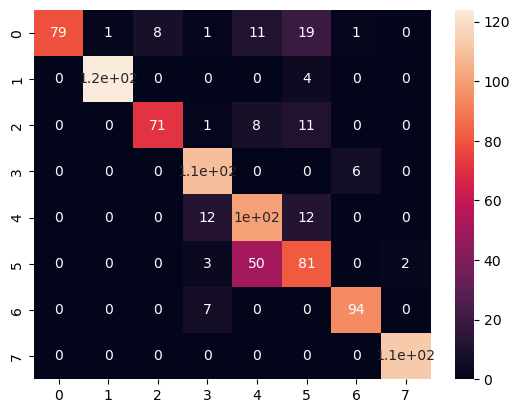

In [33]:
import seaborn as sns
sns.heatmap(confusion_mat,annot=True)

In [34]:
import pandas as pd
from sklearn.metrics import classification_report
print(classification_report(val_set3.classes, y_pred,digits=4))

              precision    recall  f1-score   support

           0     1.0000    0.6583    0.7940       120
           1     0.9920    0.9688    0.9802       128
           2     0.8987    0.7802    0.8353        91
           3     0.8195    0.9478    0.8790       115
           4     0.5917    0.8065    0.6826       124
           5     0.6378    0.5956    0.6160       136
           6     0.9307    0.9307    0.9307       101
           7     0.9826    1.0000    0.9912       113

    accuracy                         0.8308       928
   macro avg     0.8566    0.8360    0.8386       928
weighted avg     0.8493    0.8308    0.8322       928

